# Tutorial 3: Bootstrapping and its Relationship to the Sampling Distribution

### Lecture and Tutorial Learning Goals
After completing this week's lecture and tutorial work, you will be able to:
1. Explain why we don’t know/have a sampling distribution in practice/real life.
2. Define bootstrapping.
3. Write a computer script to create a bootstrap distribution to approximate a sampling distribution.
4. Contrast a bootstrap sampling distribution with a sampling distribution obtained using multiple samples.

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
source("tests_tutorial_03.R")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“package ‘infer’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks 

## 1. Warm-Up Questions

Let's start off with a few questions about bootstrapping and sampling practices in reality.

**Question 1.0**
<br>{points: 1}

In 1-2 sentences, explain what bootstrapping is useful for.

Boostrapping is used to understand the population when we dont have the entire population information but rather a sample. It is most useful for when we can only have a sample, we sample with replacement from the sample to understand point estimates.

**Question 1.1**
<br>{points: 1}

True or false?

A bootstrap sampling distribution will **always** have a similar width as the sampling distribution it is approximating.

_Assign your answer to an object called `answer1.1`. Your answer should be either "true" or "false", surrounded by quotes._

In [2]:
# answer1.1 <- ...

# your code here
answer1.1 <- "false"

In [3]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br>{points: 1}

True or false?

In reality, when we take a sample from the population, we are sampling with replacement.

_Assign your answer to an object called `answer1.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [4]:
# answer1.2 <- ...

# your code here
answer1.2 <- "false"

In [5]:
test_1.2()

[1] "Success!"


## 2. Bootstrap Distribution vs Sampling Distribution

By now you should understand that not all sampling distributions come out as a nice symmetrical bell shape. In `worksheet_02` you saw one example of this when we were studying the distributions of point estimates for the proportion of properties that are located in downtown Vancouver, using the `tax_2019` data set. In the code cell below, we have re-created this sampling distribution so we can look at it a bit more closely.

_Use the plot below to answer the **next question**._

`summarise()` ungrouping output (override with `.groups` argument)



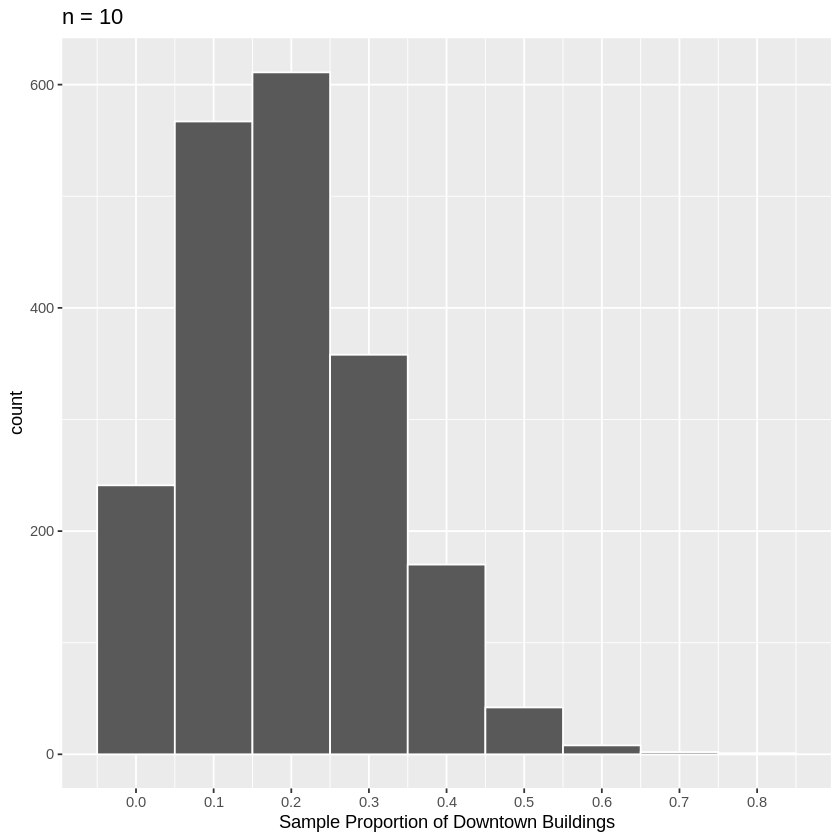

In [6]:
set.seed(2410) # Use the same seed as last time to get
               # the exact same observations in our samples.

sampling_dist <- tax_2019 %>% 
    filter(!is.na(geo_local_area)) %>% 
    select(geo_local_area) %>% 
    rep_sample_n(size = 10, reps = 2000) %>% 
    group_by(replicate) %>% 
    summarize(x = sum(geo_local_area == "Downtown"),
              n = n()) %>% 
    mutate(sample_proportion = x / n) %>% 
    ggplot(aes(x = sample_proportion)) +
        geom_histogram(binwidth = 1/10, colour = "white") +
        xlab("Sample Proportion of Downtown Buildings") +
        ggtitle("n = 10") +
        scale_x_continuous(breaks = seq(0, 0.9, 0.1))
sampling_dist

**Question 2.0**
<br>{points: 1}

The true proportion of buildings in Vancouver that are located downtown is 0.195. Suppose the data was adjusted such that the true proportion is now 0.5, and we created another sampling distribution with samples of size 100 using the code above. How would the symmetry of the new sampling distribution compare to the one generated above?

A. The new sampling distribution would be less symmetrical.

B. The symmetry of the new sampling distribution would be about the same.

C. The new sampling distribution would be more symmetrical.

D. It is impossible to tell how the symmetry of the new sampling distribution would compare.

_Assign your answer to an object called `answer2.0`. Your answer should be a single character surrounded by quotes._

In [11]:
# answer2.0 <- ...

# your code here
answer2.0 <- "C"

In [12]:
test_2.0()

[1] "Success!"


### Root Barriers

In this section, we are going to test the limits of bootstrapping to see whether it results in reliable approximations of asymmetrical sampling distributions, such as the one shown above. To do this, we will attempt to use bootstrapping to estimate sampling distributions that we know are even less symmetrical and compare them to see if our estimates are reasonable. One population that we have at our disposal that yields some asymmetrical sampling distributions is the `vancouver_trees` data set from the `datateachr` package. One example of this is the sampling distribution of sample proportions for the `root_barrier` variable; in this section, we will be looking at the proportion of trees that **do not** have a root barrier.

<img src="https://www.flexiblelining.co.uk/media/shared/product-images/urban-hard-landscaping/rootbarrier/170UR4170-rootbarrier-panels-1.jpg" width=400>

<div style="text-align: center"><i>Image from <a href="https://www.flexiblelining.co.uk/green-roof-systems/roof-garden-root-barrier/ribbed-root-barrier-panels"> Flexible Lining Products</i></a></div>

Recall that the `vancouver_trees` dataset contains information about public trees planted along boulevards in Vancouver. The `root_barrier` variable in this dataset specifies whether or not a tree was planted with a root barrier or not. A root barrier is a type of underground wall that protects buildings, sidewalks, and roads from roots, which can severely damage these structures. One example of a type of root barrier is shown in the picture above.

**Question 2.1** 
<br> {points: 1}

Filter `vancouver_trees` such that there are no `NA` values in the `root_barrier` column, and then select only that column. Use the scaffolding provided below as a guide:

```r
tree_pop <- vancouver_trees %>% 
    filter(...) %>% 
    ...(root_barrier)
```

_Assign your data frame to an object called `barrier_pop`._

In [13]:
# your code here
barrier_pop <- vancouver_trees %>% 
        filter(!is.na(root_barrier)) %>%
        select(root_barrier)
head(barrier_pop)

root_barrier
<chr>
N
N
N
N
N
N


In [14]:
test_2.1()

[1] "Success!"


**Question 2.2** 
<br> {points: 1}

Draw 2000 random samples of size 20 from the population `barrier_pop` using the `rep_sample_n` function and a seed of 3909. For each sample, calculate the proportion of trees that **do not** have a root barrier (i.e. where `root_barrier == "N"`) as the point estimate. Lastly, visualize the distribution of the sample proportions you just calculated by plotting a histogram using `geom_histogram` with bin widths of 1/20. Add a descriptive title to the plot using `ggtitle` and ensure that the x-axis has a human-readable label. Your final plot should have a variable named `p` on the x-axis. Use the scaffolding provided below as a guide:

```r
barrier_sampling_dist <- ... %>% 
    rep_sample_n(size = ..., reps = ..., replace = ...) %>% 
    ...(replicate) %>% 
    summarize(x = sum(... == "N"),
              n = n()) %>% 
    mutate(p = ... / ...) %>% 
    ggplot(aes(x = p)) +
        geom_histogram(... = ...) +
        xlab("Proportion") +
        ggtitle("Sampling Distribution of Proportions (n = 20)")
```

_Assign your plot to an object called `barrier_sampling_dist`._

`summarise()` ungrouping output (override with `.groups` argument)



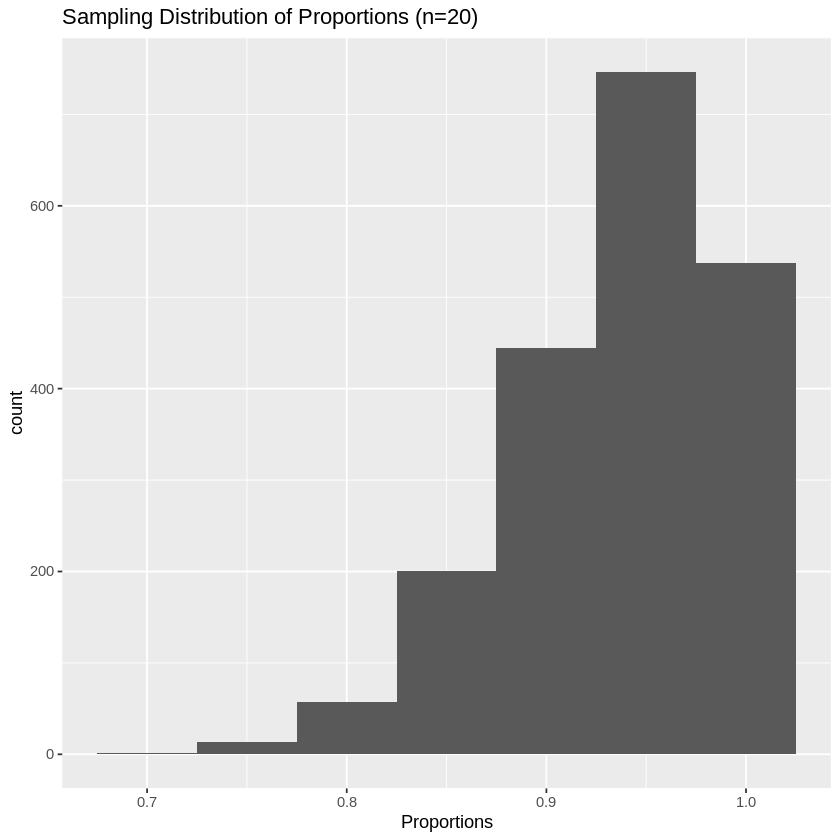

In [15]:
set.seed(3909) # DO NOT CHANGE!

# your code here
barrier_sampling_dist <- 
    barrier_pop %>%
    rep_sample_n(size=20, reps=2000,replace=FALSE) %>%
    group_by(replicate) %>%
    summarize(x=sum(root_barrier=="N"), n=n()) %>%
    mutate(p = x/n) %>%
    ggplot(aes(x=p)) +
    geom_histogram(binwidth=1/20)+
    xlab("Proportions") +
    ggtitle("Sampling Distribution of Proportions (n=20)")
barrier_sampling_dist

In [16]:
test_2.2()

[1] "Success!"


**Question 2.3** 
<br> {points: 1}

Take a single random sample of size 20 from `barrier_pop` using `rep_sample_n` and a seed of 1933. Ensure your resulting data frame only has a single column: `root_barrier`.

**Hint:** Remember to `ungroup()` before using `select()`!

_Assign your data frame to an object called `barrier_sample`._

In [17]:
set.seed(1933) # DO NOT CHANGE!

# your code here
barrier_sample <- barrier_pop %>% 
        rep_sample_n(size=20) %>%
        ungroup() %>%
        select(root_barrier)
head(barrier_sample)

root_barrier
<chr>
N
N
N
N
N
N


In [18]:
test_2.3()

[1] "Success!"


**Question 2.4** 
<br> {points: 1}

Now we want to produce a bootstrap sampling distribution using `barrier_sample` sample we just took, which we will be able to compare to the sampling distribution we generated above. We want to use the exact same scaffolding as **question 2.2** (except the object name we are saving to) to complete the following task: 

> Take 2000 bootstrap samples from `barrier_sample` using `rep_sample_n` with a seed of 2767. Then, calculate the proportion of trees in each sample that does not have a root barrier (`root_barrier == "N"`); name the column containing the sample propotions `p`. Lastly, use `geom_histogram` with bin widths of 1/20 to visualize the bootstrap distribution. Add a descriptive title to the plot using `ggtitle` and ensure that the x-axis has a human-readable label. 

**Which two `...`'s in the scaffolding below _must_ be different than the code you used in question 2.2?**

```R
# LINE  1:    bootstrap_dist_20 <- ... %>% 
# LINE  2:       rep_sample_n(size = ..., reps = ..., replace = ...) %>% 
# LINE  3:       ...(replicate) %>% 
# LINE  4:       summarize(x = sum(... == "N"),
# LINE  5:                 n = n()) %>% 
# LINE  6:       mutate(p = ... / ...) %>% 
# LINE  7:       ggplot(aes(x = p)) +
# LINE  8:           geom_histogram(... = ...) +
# LINE  9:           xlab("Proportion") +
# LINE 10:           ...("n = 20")
```

A. The `...` in `LINE 1` and the third `...` from the left in `LINE 2`

B. The `...` in `LINE 1` and the second `...` from the left in `LINE 8`

C. The first `...` from the left in `LINE 2` and the third `...` from the left in `LINE 2`

D. The first `...` from the left in `LINE 2` and the second `...` from the left in `LINE 8`

E. Some other two `...`'s not listed above.

F. None of the above; only one `...` must be different.

G. None of the above; three or more of the `...` must be different.

_Assign your answer to an object called `answer2.4`. Your answer should be a single character surrounded by quotes._

In [19]:
# answer2.4 <- ...

# your code here
answer2.4 <-"A"

In [20]:
test_2.4()

[1] "Success!"


**Question 2.5** 
<br> {points: 1}

Take 2000 bootstrap samples from `barrier_sample` using `rep_sample_n` with a seed of 2767. Then, calculate the proportion of trees in each sample that does not have a root barrier (`root_barrier == "N"`). Lastly, use `geom_histogram` with bin widths of 1/20 to visualize the bootstrap distribution. Add a descriptive title to the plot using `ggtitle` and ensure that the x-axis has a human-readable label. 

**Hint:** use your answer to the previous question and your code from **question 2.2**.

_Assign your plot to an object called `barrier_bootstrap_dist`._

`summarise()` ungrouping output (override with `.groups` argument)



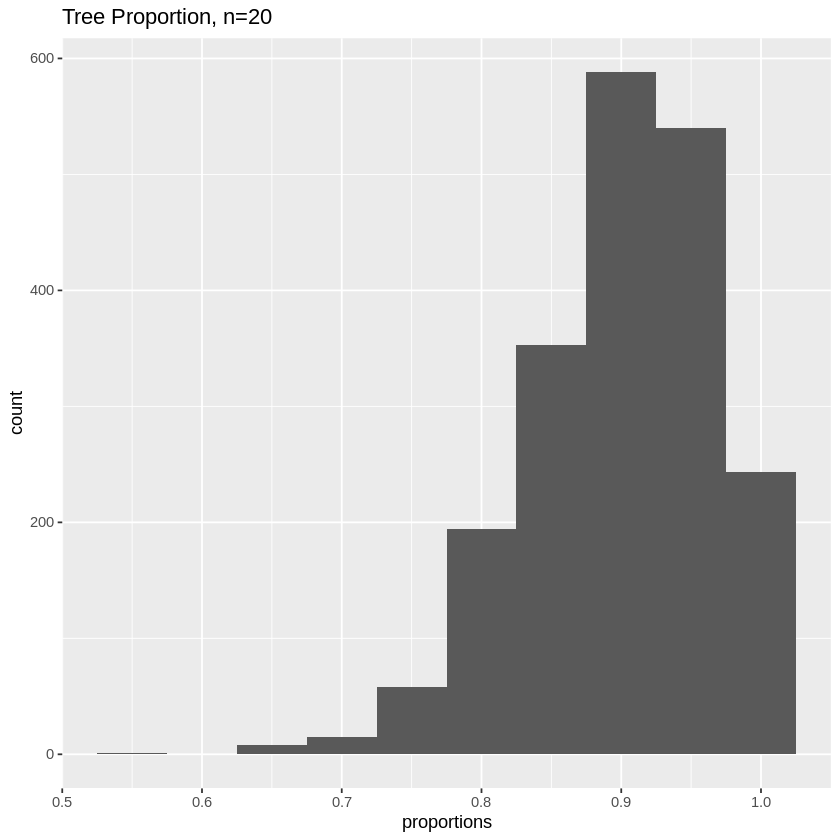

In [21]:
set.seed(2767) # DO NOT CHANGE!

# your code here
barrier_bootstrap_dist <- barrier_sample %>%
    rep_sample_n(size=20, reps=2000, replace=TRUE) %>%
    group_by(replicate) %>%
    summarize(x=sum(root_barrier== "N"), n=n())%>%
    mutate(p=x/n) %>%
    ggplot(aes(x=p))+
    geom_histogram(binwidth= 1/20)+
    ggtitle("Tree Proportion, n=20")+
    xlab("proportions")
barrier_bootstrap_dist

In [22]:
test_2.5()

[1] "Success!"


**Question 2.6** 
<br> {points: 1}

**Note:** this question has two parts!

a) Calculate the standard deviation of the sampling distribution you generated above (`barrier_sampling_dist`); this is the standard error of the corresponding estimator.

_Assign your answer to an object called `standard_error`. Your answer should be a single number._

<br>

b) Calculate the standard deviation of the bootstrap distribution you generated above (`barrier_bootstrap_dist`).

_Assign your answer to an object called `standard_deviation`. Your answer should be a single number._

**Hints:**
- You can get the data that was used to generate using a plot with `plot_name$data`, for example: `barrier_sampling_dist$data`.
- You can convert a 1x1 data frame to a number using `as.numeric()`.

In [23]:
# your code here

standard_error <-   barrier_sampling_dist$data %>% 
        summarize(standard_error2 = sd(p)) %>%
        select(standard_error2) %>%
        as.numeric()
standard_error
standard_deviation <- barrier_bootstrap_dist$data %>%  
    summarize(standardError= sd(p)) %>%
    select(standardError) %>%
    as.numeric()
standard_deviation 



[1] 0.05477771

[1] 0.06758161

In [24]:
test_2.6()

[1] "Success!"


**Question 2.7** 
<br> {points: 1}

True or false?

The standard deviation of a bootstrap distribution is a "good guess" of the standard deviation of the corresponding sampling distribution.

In [25]:
# answer2.7 <- ...

# your code here
answer2.7 <- "true"

In [26]:
test_2.7()

[1] "Success!"


**Question 2.8** 
<br> {points: 3}

Will the standard deviation of a bootstrap distribution **always** be relatively close to the standard deviation of the corresponding sampling distribution?
- If no, describe one situation related to our root barrier scenario above that would result in the `standard_deviation` object from **question 2.6** being very different than the `standard_error` object.
- If yes, explain why no such situation exists.

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

## 3. A Closer Look at Bootstrapping

There is one "rule" related to bootstrapping that we have not mentioned yet:

> When generating a bootstrap distribution to estimate the sampling distribution for the original sample size, the **bootstrap samples** should be the **same size** as the **original sample** to get a useful estimate.

For example, we would get poor results if we took a sample of size 30 from the population, and then took many bootstrap samples (resamples from the original sample, with replacement) of size 60 to estimate a sampling distribution for samples of size 30. Why? Let's try it out ourselves to discover the answer. Afterwards, we'll also go through some other questions to continue to solidify our understanding of the various nuances related to bootstrapping.

### Building Permits

To explore the "rule of thumb" that we mentioned above, we will again use the `vancouver_trees` data set from the `datateachr` pacakge. However, this time the population we are interested in is only the trees with the common name `"PISSARD PLUM"`, and the parameter that we are interested in is the standard deviation of the `diameter` of these trees.

In [116]:
head(vancouver_trees)

tree_id,civic_number,std_street,genus_name,species_name,cultivar_name,common_name,assigned,root_barrier,plant_area,on_street_block,on_street,neighbourhood_name,street_side_name,height_range_id,diameter,curb,date_planted,longitude,latitude
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>
149556,494,W 58TH AV,ULMUS,AMERICANA,BRANDON,BRANDON ELM,N,N,N,400,W 58TH AV,MARPOLE,EVEN,2,10,N,1999-01-13,-123.1161,49.21776
149563,450,W 58TH AV,ZELKOVA,SERRATA,NA,JAPANESE ZELKOVA,N,N,N,400,W 58TH AV,MARPOLE,EVEN,4,10,N,1996-05-31,-123.1147,49.21776
149579,4994,WINDSOR ST,STYRAX,JAPONICA,NA,JAPANESE SNOWBELL,N,N,4,4900,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,3,4,Y,1993-11-22,-123.0846,49.23938
149590,858,E 39TH AV,FRAXINUS,AMERICANA,AUTUMN APPLAUSE,AUTUMN APPLAUSE ASH,Y,N,4,800,E 39TH AV,KENSINGTON-CEDAR COTTAGE,EVEN,4,18,Y,1996-04-29,-123.0870,49.23469
149604,5032,WINDSOR ST,ACER,CAMPESTRE,NA,HEDGE MAPLE,N,N,4,5000,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,2,9,Y,1993-12-17,-123.0846,49.23894
149616,585,W 61ST AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,N,N,B,500,W 61ST AV,MARPOLE,ODD,2,5,Y,NA,-123.1196,49.21513


**Question 3.0** 
<br> {points: 3}

Filter the `vancouver_trees` dataset for the population that we are interested in and then select the variable that we are interested in (your final data frame should have a single column).

_Assign your data frame to an object called `plum_pop`._

In [27]:
# your code here
plum_pop <- vancouver_trees %>%
    filter(common_name=="PISSARD PLUM")%>%
    select(diameter)
    
head(plum_pop)

diameter
<dbl>
7.25
11.00
10.00
8.25
8.00
15.25


In [28]:
test_3.0()

[1] "Success!"


**Question 3.1** 
<br> {points: 3}

Take a single random sample of size 10 from `plum_pop` using the `rep_sample_n` function and a seed of 0737. Ensure your resulting data frame only has a single column: `diameter`.

_Assign your data frame to an object called `plum_sample`._

In [29]:
set.seed(0737) # DO NOT CHANGE!

# your code here
plum_sample <- plum_pop %>% rep_sample_n(size=10) %>% ungroup()%>%select(diameter)
head(plum_sample)

diameter
<dbl>
5.00
14.50
20.00
10.00
16.50
17.25


In [30]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "plum_sample"', {
  expect_true(exists("plum_sample"))
})
test_that("Solution should be a data frame", {
  expect_true("data.frame" %in% class(plum_sample))
})

**Question 3.2** 
<br> {points: 3}

Take 2500 bootstrap samples **of size 100** from the sample you took in the previous question by using the `rep_sample_n` function and a seed of 9284. 

_Assign your data frame to an object called `plum_resamples`._

In [31]:
set.seed(9284) # DO NOT CHANGE!

# your code here
plum_resamples <- plum_sample %>% rep_sample_n (size=100, reps=2500, replace=TRUE)
head(plum_resamples)

replicate,diameter
<int>,<dbl>
1,5.00
1,16.50
1,17.25
1,14.50
1,17.25
1,5.00


In [32]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "plum_resamples"', {
  expect_true(exists("plum_resamples"))
})
test_that("Solution should be a data frame", {
  expect_true("data.frame" %in% class(plum_resamples))
})

**Question 3.3** 
<br> {points: 3}

Calculate the standard deviation for each resample that you took in the previous question with `group_by()` and `summarize()`. Name the new column containing the standard deviation `sd`.

_Assign your data frame to an object called `resample_estimates`._

In [33]:
# your code here
resample_estimates <- plum_resamples %>%
    group_by(replicate) %>%
    summarize(sd=sd(diameter))
head(resample_estimates)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sd
<int>,<dbl>
1,5.145168
2,4.947918
3,4.106274
4,4.450805
5,4.387499
6,4.407222


In [34]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "resample_estimates"', {
  expect_true(exists("resample_estimates"))
})
test_that("Solution should be a data frame", {
  expect_true("data.frame" %in% class(resample_estimates))
})

**Question 3.3** 
<br> {points: 3}

Visualize the bootstrap distribution (of `resample_estimates`) by plotting a histogram using `geom_histogram` with bin widths of 0.25. Ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `plum_bootstrap_dist`._

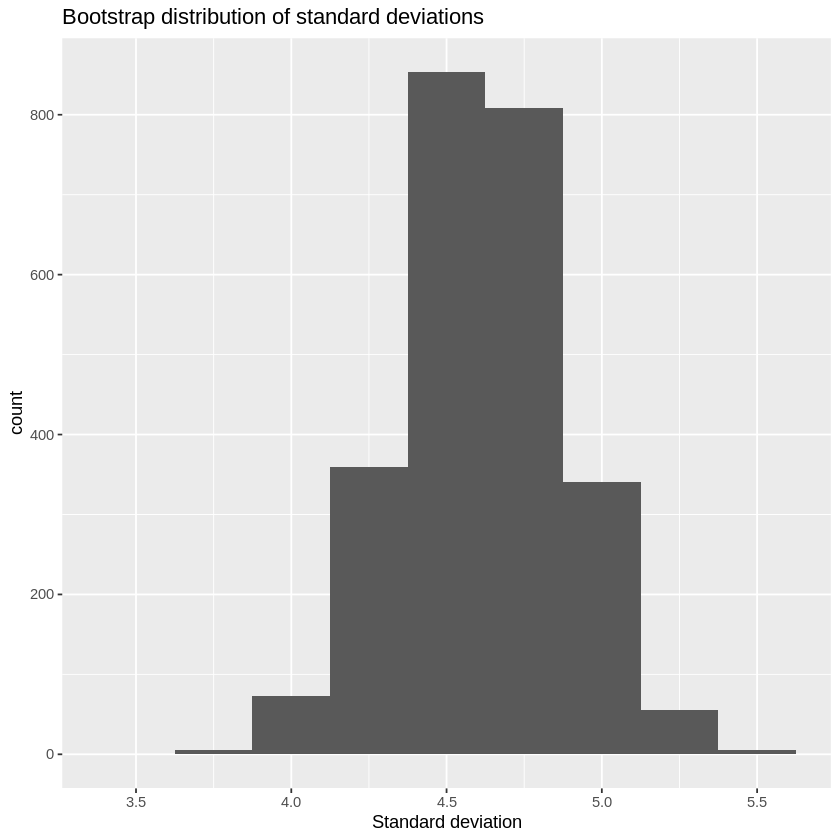

In [35]:
# your code here
plum_bootstrap_dist <- resample_estimates %>%
    ggplot(aes(x=sd))+
    geom_histogram(binwidth=0.25)+
    xlab("Standard deviation")+
    ggtitle("Bootstrap distribution of standard deviations")
plum_bootstrap_dist

In [36]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "plum_bootstrap_dist"', {
  expect_true(exists("plum_bootstrap_dist"))
})
test_that("Solution should be a ggplot object", {
  expect_true(is.ggplot(plum_bootstrap_dist))
})

**Question 3.4** 
<br> {points: 3}

Produce a sampling distribution (**not** a bootstrap distribution) of sample standard deviations for samples of size 10 from the population `plum_pop` using a procedure similar to the previous questions and the last section; use `geom_histogram` with bin widths of 0.25. Also, use 2500 sample replicates and a seed of 2362.

_Assign your plot to an object called `plum_sampling_dist`._

`summarise()` ungrouping output (override with `.groups` argument)



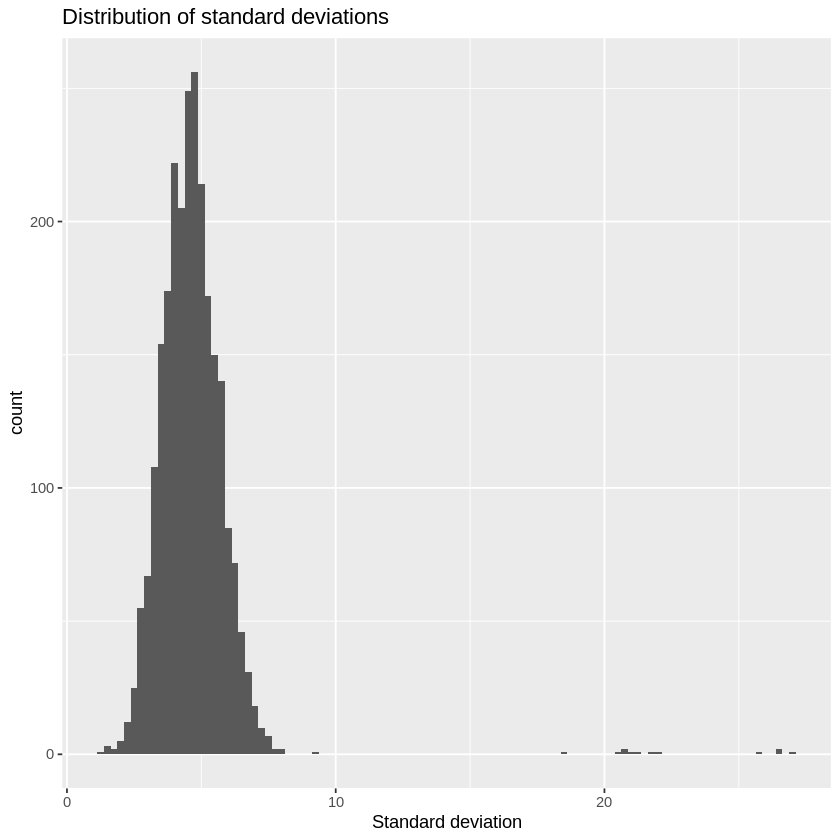

In [37]:
set.seed(2362) # DO NOT CHANGE!

# your code here
plum_sampling_dist <- plum_pop %>% rep_sample_n(size=10, reps=2500) %>%
    group_by(replicate)%>%
    summarize(sd=sd(diameter)) %>%
    ggplot(aes(x=sd))+
    geom_histogram(binwidth=0.25) +
    ggtitle("Distribution of standard deviations")+
    xlab("Standard deviation")
    
plum_sampling_dist

In [141]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "plum_sampling_dist"', {
  expect_true(exists("plum_sampling_dist"))
})
test_that("Solution should be a ggplot object", {
  expect_true(is.ggplot(plum_sampling_dist))
})

In the code cell below, we have used `plot_grid` to plot the sample distribution and bootstrap distribution side by side.

**Note:** some of the sample standard deviations are not visible because we have manually set bounds on the x-axis so you can compare the important parts of the distributions more easily

_Use the two plots below to answer the next **three questions**._

Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


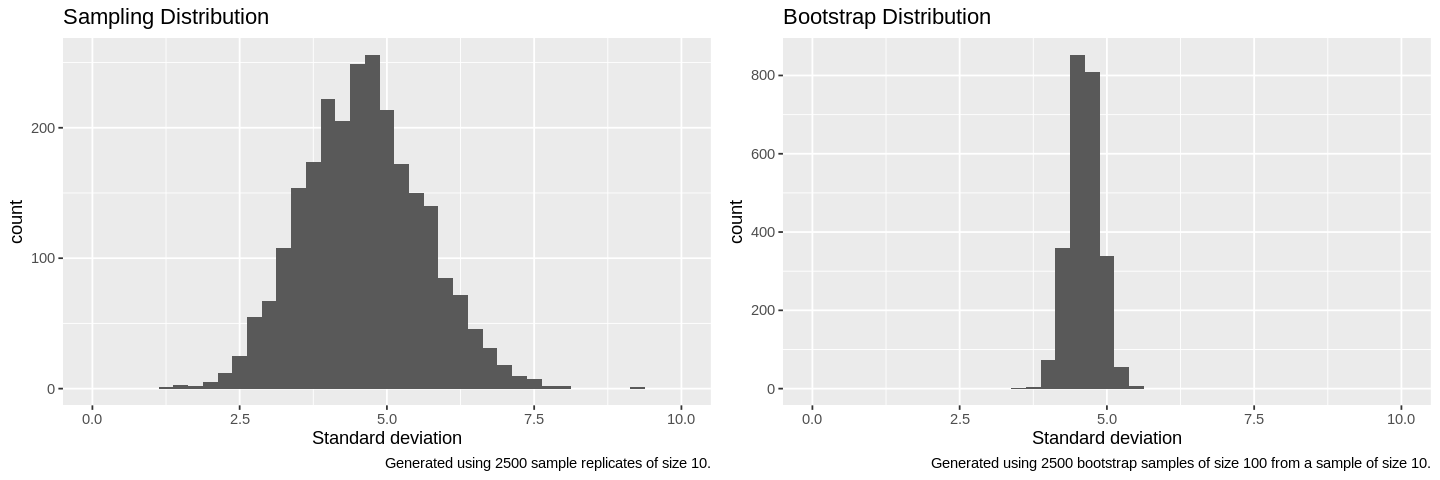

In [142]:
options(repr.plot.width = 12, repr.plot.height = 4)
plot_grid(plum_sampling_dist +
              labs(title = "Sampling Distribution",
                   caption = "Generated using 2500 sample replicates of size 10.") +
              scale_x_continuous(limits = c(0, 10)),
          plum_bootstrap_dist +
              labs(title = "Bootstrap Distribution",
                   caption = "Generated using 2500 bootstrap samples of size 100 from a sample of size 10.") + 
              scale_x_continuous(limits = c(0, 10)),
          ncol = 2)

**Question 3.5** 
<br> {points: 3}

Which statement **best** describes the bootstrap distribution above?

A. The distribution of many point estimates for the standard deviation of the population, which were acquired by taking many samples from the population and calculating the standard deviation of each sample.

B. The distribution of many point estimates for the standard deviation of the sampling distribution (which is the standard error of the corresponding estimator), which were acquired by re-sampling from the original sample and calculating the standard deviation of each re-sample.

C. The distribution of the standard deviations of many samples that were taken from the population.

D. The distribution of standard deviations for many re-samples that were taken from the original sample.

_Assign your answer to an object called `answer3.5`. Your answer should be a single character surrounded by quotes._

In [143]:
# answer3.5 <- ...

# your code here
answer3.5 <- "D"

In [144]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.5"', {
  expect_true(exists("answer3.5"))
})
test_that('Solution should be a single character ("A", "B", "C", or "D")', {
  expect_match(answer3.5, "a|b|c|d", ignore.case = TRUE)
})

**Question 3.6** 
<br> {points: 3}

By referencing the plots above, explain why it's not a good idea to take bootstrap sizes of a **larger size than the original sample** to estimate the sampling distribution for the original sample size.

Taking a larger size than the original sample messes up the spread of the standard deviation even though the mean is quite acurate.

**Question 3.7** 
<br> {points: 3}

Suppose you took a single sample of size 164 and then took many bootstrap samples of size 10 from the first sample to produce a bootstrap distribution for the mean of the `diameter` variable in the `plum_pop` population. Suppose you wanted to use the standard deviation of the bootstrap distribution to estimate the standard deviation of the sampling distribution of sample means for the `diameter` variable for samples of size 164. How would you expect the estimate to compare to the actual standard error?

A. The estimate would likely be an under-estimate.

B. The estimate would likely be accurate.

C. The estimate would likely be an over-estimate.

D. There is not enough information to make this comparison.

_Assign your answer to an object called `answer3.7`. Your answer should be a single character surrounded by quotes._

In [145]:
# answer3.7 <- ...

# your code here
answer3.7 <- "D"

In [146]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.7"', {
  expect_true(exists("answer3.7"))
})
test_that('Solution should be a single character ("A", "B", "C", or "D")', {
  expect_match(answer3.7, "a|b|c|d", ignore.case = TRUE)
})

### More Bootstrapping Nuances

**Question 3.8** 
<br> {points: 3}

Suppose a bootstrap distribution of sample means of the `diameter` variable in `plum_pop`, using `rep_sample_n` to take single sample of size 8 from the population and 3000 bootstrap samples. The resulting distribution is displayed below with bin widths of 0.25:

<img src="plot.png" width=600/>

a) Given that the standard deviation of the `diameter` variable for the population `plum_pop` is around 5.0, is this a shape that you would expect the bootstrap distribution to have?

b) If you answered yes, justify yourself in 1-2 sentences. If you answered no, justify yourself in 1-2 sentence and describe an error or scenario that would result in such a distribution in another sentence.

a) No.
b) this is not the shape i would expect the sample to look like. this is because, standard deviation is supposed to show on the plot, there should be a normal distribution but it seems the standard deviation in this diagram is 0.


**Question 3.9** 
<br> {points: 3}

Consider the following single random sample of 6 observations of the reported average hours of screen time a person is exposed to each day:

| `screen_time` <br> `<dbl>`|
| -- |
| 3 |
| 6 |
| 8 |
| 1 |
| 7 |
| 7 |
    
Below are two more data frames that are claimed to have been created by bootstrapping from the original sample.

| `screen_time` <br> `<dbl>`|
| -- |
| 6 |
| 7 |
| 6 |
| 7 |
| 7 |
| 1 |

| `screen_time` <br> `<dbl>`|
| -- |
| 7 |
| 1 |
| 7 |
| 3 |
| 6 |
| 8 |

 Consider the values in the two data frames above. Is there any evidence to falsify the claim? Explain why or why not in your own words in a few sentences.

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.